In [ ]:
#Credit Card fraud detection
!pip install pendulum
!pip install category_encoders

     |████████████████████████████████| 155 kB 4.9 MB/s 
     |████████████████████████████████| 489 kB 45.1 MB/s 
     |████████████████████████████████| 86 kB 3.0 MB/s 


In [ ]:
import pandas as pd
import numpy as np
from numpy import argmax

from datetime import date, time, timedelta
import pendulum # for time formatting

import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce # for categorical encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1HC7MfMyg4KphO51bc21JKIxeubmcl8C_" -O orders.csv


--2022-05-04 15:50:09--  https://drive.google.com/uc?export=download&id=1HC7MfMyg4KphO51bc21JKIxeubmcl8C_
Resolving drive.google.com (drive.google.com)... 173.194.216.102, 173.194.216.139, 173.194.216.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.216.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-14-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1pjq1s6pt2gkccpiqi6uh0t7fhkhfjce/1651679400000/06496627672658439642/*/1HC7MfMyg4KphO51bc21JKIxeubmcl8C_?e=download [following]
--2022-05-04 15:50:11--  https://doc-0k-14-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1pjq1s6pt2gkccpiqi6uh0t7fhkhfjce/1651679400000/06496627672658439642/*/1HC7MfMyg4KphO51bc21JKIxeubmcl8C_?e=download
Resolving doc-0k-14-docs.googleusercontent.com (doc-0k-14-docs.googleusercontent.com)... 172.217.193.132, 2607:f8b0:400c:c18::84
Connecting to doc-0k-14-docs.googleusercontent.com (doc-0k-14

In [ ]:
df = pd.read_csv('orders.csv') 

In [ ]:
df.head()


,order_id,city,category_name,product_id,product_name,amount,device,payment_id,customer_ip,customer_id,...,created_dow_sin,created_dow_cos,created_wom_sin,created_wom_cos,experience_dom_sin,experience_dom_cos,experience_dow_sin,experience_dow_cos,experience_wom_sin,experience_wom_cos
0,2166688,SINGAPORE,Singapore Zoo,7360,Singapore Zoo with Tram Ride,110.80,HIGH_END_MOBILE,pay_6bc2eb4hzg2u7dmfktmakyqex4,vzH6NNH4iwxhe+eSr1L84w==,/8+13Ig7x5JbiszC0f4AHw==,...,0.866025,0.5,0.951057,0.309017,0.201299,0.979530,0.866025,0.5,0.951057,0.309017
1,2166694,SINGAPORE,Singapore Zoo,7360,Singapore Zoo with Tram Ride,110.80,HIGH_END_MOBILE,pay_xpjji7qdllhupaus3jad42meuy,vzH6NNH4iwxhe+eSr1L84w==,/8+13Ig7x5JbiszC0f4AHw==,...,0.866025,0.5,0.951057,0.309017,0.201299,0.979530,0.866025,0.5,0.951057,0.309017
2,2166764,DUBAI,Dubai Frame,8541,Dubai Frame Anytime Entry Tickets,32.67,HIGH_END_MOBILE,pay_z3e3bici56muhas3wfj4s5iq2u,cr7Phm0QLRXcaKa/bjpTDg==,gjP75WqjRZ9ZtSkHoFd+mw==,...,0.866025,0.5,0.951057,0.309017,0.988468,0.151428,-0.866025,0.5,0.587785,-0.809017
3,2166991,SINGAPORE,Singapore Cable Car,7372,Singapore Cable Car Sky Pass: Round Trip,66.14,HIGH_END_MOBILE,pay_c7skbbtd7ree3ji3io4i3dde34,ckoTvtWdM4zKRdFyDH4YcQ==,XDZdavE7L2SLdQ1zdp5FAw==,...,0.866025,0.5,0.951057,0.309017,0.201299,0.979530,0.866025,0.5,0.951057,0.309017
4,2167074,SINGAPORE,Universal Studios Singapore,7442,Universal Studios Singapore™ Tickets,106.77,DESKTOP,pay_dyz4xj7cdnuurgq4rapandtsyu,5H/u0Mbh8cMZxsXNDZ2QYw==,9M/VfPTvlko/2Zdtg5Pg1A==,...,0.866025,0.5,0.951057,0.309017,0.394356,0.918958,0.866025,-0.5,0.951057,0.309017


In [ ]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76829 entries, 0 to 76828
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       76829 non-null  int64  
 1   city                           76829 non-null  object 
 2   category_name                  76743 non-null  object 
 3   product_id                     76829 non-null  int64  
 4   product_name                   76829 non-null  object 
 5   amount                         76829 non-null  float64
 6   device                         76829 non-null  object 
 7   payment_id                     76829 non-null  object 
 8   customer_ip                    76829 non-null  object 
 9   customer_id                    76829 non-null  object 
 10  payment_method                 76829 non-null  object 
 11  payment_method_provider        76829 non-null  object 
 12  payment_method_bin             76778 non-null 

In [ ]:
df.columns


Index(['order_id', 'city', 'category_name', 'product_id', 'product_name',
       'amount', 'device', 'payment_id', 'customer_ip', 'customer_id',
       'payment_method', 'payment_method_provider', 'payment_method_bin',
       'payment_method_type', 'payment_method_product',
       'payment_method_card_category', 'payment_method_issuer_bank',
       'payment_method_issuer_country', 'is_fraudulent', 'time_diff',
       'created_at_hod_sin', 'created_at_hod_cos', 'created_dom_sin',
       'created_dom_cos', 'created_dow_sin', 'created_dow_cos',
       'created_wom_sin', 'created_wom_cos', 'experience_dom_sin',
       'experience_dom_cos', 'experience_dow_sin', 'experience_dow_cos',
       'experience_wom_sin', 'experience_wom_cos'],
      dtype='object')

In [ ]:
df["is_fraudulent"].value_counts()

False    75817
True      1012
Name: is_fraudulent, dtype: int64

In [ ]:
df.nunique() # unique values per feature


order_id                         76829
city                                 2
category_name                       96
product_id                         353
product_name                       340
amount                            8627
device                               5
payment_id                       76829
customer_ip                      44208
customer_id                      51109
payment_method                       1
payment_method_provider              5
payment_method_bin                6991
payment_method_type                  8
payment_method_product             144
payment_method_card_category         2
payment_method_issuer_bank        2046
payment_method_issuer_country      151
is_fraudulent                        2
time_diff                          117
created_at_hod_sin                  24
created_at_hod_cos                  13
created_dom_sin                     31
created_dom_cos                     18
created_dow_sin                      6
created_dow_cos          

In [ ]:
# dropping product_name as we have product_id
df = df.drop(columns=["order_id", "payment_method", "payment_id", "product_name"])
df.head()

,city,category_name,product_id,amount,device,customer_ip,customer_id,payment_method_provider,payment_method_bin,payment_method_type,...,created_dow_sin,created_dow_cos,created_wom_sin,created_wom_cos,experience_dom_sin,experience_dom_cos,experience_dow_sin,experience_dow_cos,experience_wom_sin,experience_wom_cos
0,SINGAPORE,Singapore Zoo,7360,110.80,HIGH_END_MOBILE,vzH6NNH4iwxhe+eSr1L84w==,/8+13Ig7x5JbiszC0f4AHw==,Mastercard,542550.0,Credit,...,0.866025,0.5,0.951057,0.309017,0.201299,0.979530,0.866025,0.5,0.951057,0.309017
1,SINGAPORE,Singapore Zoo,7360,110.80,HIGH_END_MOBILE,vzH6NNH4iwxhe+eSr1L84w==,/8+13Ig7x5JbiszC0f4AHw==,Mastercard,542550.0,Credit,...,0.866025,0.5,0.951057,0.309017,0.201299,0.979530,0.866025,0.5,0.951057,0.309017
2,DUBAI,Dubai Frame,8541,32.67,HIGH_END_MOBILE,cr7Phm0QLRXcaKa/bjpTDg==,gjP75WqjRZ9ZtSkHoFd+mw==,Mastercard,515590.0,Credit,...,0.866025,0.5,0.951057,0.309017,0.988468,0.151428,-0.866025,0.5,0.587785,-0.809017
3,SINGAPORE,Singapore Cable Car,7372,66.14,HIGH_END_MOBILE,ckoTvtWdM4zKRdFyDH4YcQ==,XDZdavE7L2SLdQ1zdp5FAw==,Mastercard,554637.0,Credit,...,0.866025,0.5,0.951057,0.309017,0.201299,0.979530,0.866025,0.5,0.951057,0.309017
4,SINGAPORE,Universal Studios Singapore,7442,106.77,DESKTOP,5H/u0Mbh8cMZxsXNDZ2QYw==,9M/VfPTvlko/2Zdtg5Pg1A==,Mastercard,551619.0,Debit,...,0.866025,0.5,0.951057,0.309017,0.394356,0.918958,0.866025,-0.5,0.951057,0.309017


In [ ]:
df.shape

(76829, 30)

In [ ]:
# drop duplicates
if df.shape[0] == df.drop_duplicates().shape[0] :
    print('No duplicates Found')
else:
    duplicates = df.shape[0] - df.drop_duplicates().shape[0]
    print('{} duplicates found'.format(duplicates))

6821 duplicates found


In [ ]:
df = df.drop_duplicates()

In [ ]:
#NAN values
df.isna().sum()


city                                0
category_name                      83
product_id                          0
amount                              0
device                              0
customer_ip                         0
customer_id                         0
payment_method_provider             0
payment_method_bin                 46
payment_method_type                61
payment_method_product           1886
payment_method_card_category     2413
payment_method_issuer_bank       2838
payment_method_issuer_country      66
is_fraudulent                       0
time_diff                           0
created_at_hod_sin                  0
created_at_hod_cos                  0
created_dom_sin                     0
created_dom_cos                     0
created_dow_sin                     0
created_dow_cos                     0
created_wom_sin                     0
created_wom_cos                     0
experience_dom_sin                  0
experience_dom_cos                  0
experience_d

In [ ]:
df = df.dropna(axis = 0, how= 'any', 
               subset = ['payment_method_issuer_bank','payment_method_product', 'payment_method_card_category'])

In [ ]:
df.isna().sum()


city                              0
category_name                    75
product_id                        0
amount                            0
device                            0
customer_ip                       0
customer_id                       0
payment_method_provider           0
payment_method_bin                0
payment_method_type               0
payment_method_product            0
payment_method_card_category      0
payment_method_issuer_bank        0
payment_method_issuer_country    11
is_fraudulent                     0
time_diff                         0
created_at_hod_sin                0
created_at_hod_cos                0
created_dom_sin                   0
created_dom_cos                   0
created_dow_sin                   0
created_dow_cos                   0
created_wom_sin                   0
created_wom_cos                   0
experience_dom_sin                0
experience_dom_cos                0
experience_dow_sin                0
experience_dow_cos          

In [ ]:
df['category_name']

0                      Singapore Zoo
2                        Dubai Frame
3                Singapore Cable Car
4        Universal Studios Singapore
6                    Trickeye Museum
                    ...             
76822             At The Top Tickets
76823           Dubai Dinner Cruises
76824                 Dubai Aquarium
76825                 Dubai Aquarium
76828      Lifestyle & Entertainment
Name: category_name, Length: 63344, dtype: object

In [ ]:
# fill other for catgeory_name=null
df['category_name'] = df['category_name'].fillna('other')


In [ ]:
df['payment_method_issuer_country']

0                   Singapore
1                   Singapore
2                      Brazil
3                       India
4                      Brunei
                 ...         
76824                 Hungary
76825                  France
76826           United States
76827    United Arab Emirates
76828           United States
Name: payment_method_issuer_country, Length: 69547, dtype: object

In [ ]:
df['payment_method_issuer_country'] = df['payment_method_issuer_country'].fillna('other')


In [ ]:
df.isna().sum()

city                             0
category_name                    0
product_id                       0
amount                           0
device                           0
customer_ip                      0
customer_id                      0
payment_method_provider          0
payment_method_bin               0
payment_method_type              0
payment_method_product           0
payment_method_card_category     0
payment_method_issuer_bank       0
payment_method_issuer_country    0
is_fraudulent                    0
time_diff                        0
created_at_hod_sin               0
created_at_hod_cos               0
created_dom_sin                  0
created_dom_cos                  0
created_dow_sin                  0
created_dow_cos                  0
created_wom_sin                  0
created_wom_cos                  0
experience_dom_sin               0
experience_dom_cos               0
experience_dow_sin               0
experience_dow_cos               0
experience_wom_sin  

In [ ]:
# Dataset
X = df.drop(['is_fraudulent'], axis = 1)
y = df['is_fraudulent']

In [ ]:
# Train, CV, test split
from sklearn.model_selection import train_test_split
#0.6, 0.2, 0.2 split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [ ]:
X_train.head()

,city,category_name,product_id,amount,device,customer_ip,customer_id,payment_method_provider,payment_method_bin,payment_method_type,...,created_dow_sin,created_dow_cos,created_wom_sin,created_wom_cos,experience_dom_sin,experience_dom_cos,experience_dow_sin,experience_dow_cos,experience_wom_sin,experience_wom_cos
21739,DUBAI,Dubai Aquarium,2545,87.12,DESKTOP,wWJfUhoQCwchmy/3xjNdlA==,aJnycyTV6pNjK2eWk+Qxfw==,Visa,471386.0,Credit,...,0.000000,1.0,5.877853e-01,-0.809017,0.988468,0.151428,1.224647e-16,-1.0,5.877853e-01,-0.809017
16970,DUBAI,Boat Tours,9387,49.01,IOS_APP,BBRWqHvUck2tPR3l3slN5w==,TbCD0Vag9EplxAl8m6jkGg==,Visa,455862.0,Prepaid,...,0.000000,1.0,-2.449294e-16,1.000000,-0.201299,0.979530,0.000000e+00,1.0,-9.510565e-01,0.309017
43517,DUBAI,Desert Safaris in Dubai,7456,68.06,DESKTOP,EgKAHe+a1s642TtkTB2lmw==,emCZn9kJuGmgQy9aS+LsQg==,Visa,440066.0,Credit,...,0.000000,1.0,5.877853e-01,-0.809017,-0.394356,0.918958,-2.449294e-16,1.0,-2.449294e-16,1.000000
46897,DUBAI,At The Top Tickets,1866,96.93,DESKTOP,q9N9GowseBTMTM4G3xWbKw==,mVx+fGN99N4U1F2E4tUvbA==,Visa,471386.0,Credit,...,-0.866025,0.5,-2.449294e-16,1.000000,-0.394356,0.918958,-2.449294e-16,1.0,-2.449294e-16,1.000000
73944,DUBAI,Attractions,7210,53.09,HIGH_END_MOBILE,Hb00MH7akjKcWnQC9vKOmg==,zqFQtvovB6Q8gPC82ojMLQ==,Visa,443913.0,Debit,...,-0.866025,-0.5,-9.510565e-01,0.309017,-0.790776,-0.612106,-8.660254e-01,-0.5,-9.510565e-01,0.309017


In [ ]:
set(X.columns) - set(X.select_dtypes(['number']).columns)

{'category_name',
 'city',
 'customer_id',
 'customer_ip',
 'device',
 'payment_method_card_category',
 'payment_method_issuer_bank',
 'payment_method_issuer_country',
 'payment_method_product',
 'payment_method_provider',
 'payment_method_type'}

In [ ]:
# Target encoding using mean 
#
ce_target = ce.TargetEncoder(cols = ['category_name','city','customer_id','customer_ip','device','payment_method_card_category','payment_method_issuer_bank','payment_method_issuer_country','payment_method_product','payment_method_provider','payment_method_type'])
X_train = ce_target.fit_transform(X_train, y_train)

In [ ]:
X_val = ce_target.transform(X_val)
X_test = ce_target.transform(X_test)

In [ ]:
# Hyper-pram tuning
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

train_scores = []
val_scores = []
scaler = StandardScaler()
l=0.01
h= 1000.0
d=50.0

for la in np.arange(l,h,d):
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train, y_train)
  train_y_pred = scaled_lr.predict(X_train)
  val_y_pred = scaled_lr.predict(X_val)
  train_score = f1_score(y_train, train_y_pred)
  val_score = f1_score(y_val, val_y_pred)
  train_scores.append(train_score)
  val_scores.append(val_score)

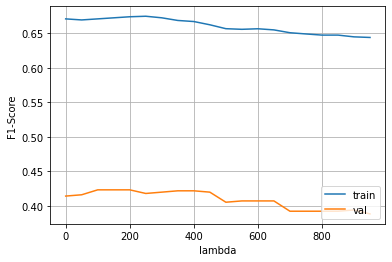

In [ ]:
plt.figure()
plt.plot(list(np.arange(l,h,d)), train_scores, label="train")
plt.plot(list(np.arange(l,h,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

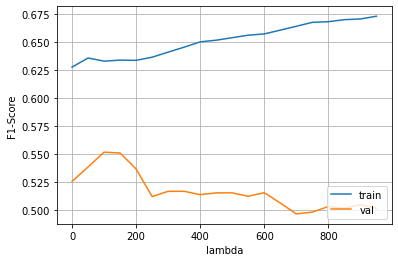

In [ ]:
# minority class needs more re-weighting

# Hyper-pram tuning
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

train_scores = []
val_scores = []
scaler = StandardScaler()
l=0.01
h= 1000.0
d=50.0

for la in np.arange(l,h,d):
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la, class_weight={ 0:0.1, 1:0.9 }))
  scaled_lr.fit(X_train, y_train)
  train_y_pred = scaled_lr.predict(X_train)
  val_y_pred = scaled_lr.predict(X_val)
  train_score = f1_score(y_train, train_y_pred)
  val_score = f1_score(y_val, val_y_pred)
  train_scores.append(train_score)
  val_scores.append(val_score)

#plotting
plt.figure()
plt.plot(list(np.arange(l,h,d)), train_scores, label="train")
plt.plot(list(np.arange(l,h,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

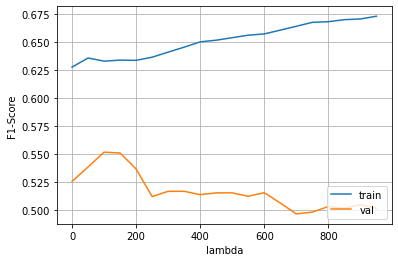

In [ ]:
# minority class needs more weighting

# Hyper-pram tuning
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

train_scores = []
val_scores = []
scaler = StandardScaler()
l=0.01
h= 1000.0
d=50.0

for la in np.arange(l,h,d):
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la, class_weight={ 0:0.1, 1:0.9 }))
  scaled_lr.fit(X_train, y_train)
  train_y_pred = scaled_lr.predict(X_train)
  val_y_pred = scaled_lr.predict(X_val)
  train_score = f1_score(y_train, train_y_pred)
  val_score = f1_score(y_val, val_y_pred)
  train_scores.append(train_score)
  val_scores.append(val_score)

#plotting
plt.figure()
plt.plot(list(np.arange(l,h,d)), train_scores, label="train")
plt.plot(list(np.arange(l,h,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

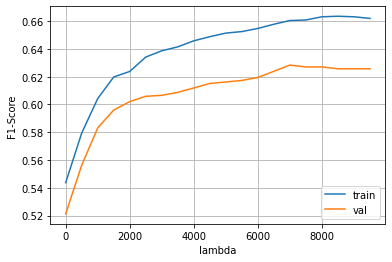

In [ ]:
# minority class needs more weighting

# Hyper-pram tuning
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

train_scores = []
val_scores = []
scaler = StandardScaler()
l=0.01
h= 10000.0 # change to 10000.0
d=500.0 # change to 500.0

for la in np.arange(l,h,d):
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la, class_weight={ 0:0.01, 1:0.75 }))
  scaled_lr.fit(X_train, y_train)
  train_y_pred = scaled_lr.predict(X_train)
  val_y_pred = scaled_lr.predict(X_val)
  train_score = f1_score(y_train, train_y_pred)
  val_score = f1_score(y_val, val_y_pred)
  train_scores.append(train_score)
  val_scores.append(val_score)

#plotting
plt.figure()
plt.plot(list(np.arange(l,h,d)), train_scores, label="train")
plt.plot(list(np.arange(l,h,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

In [ ]:
best_idx = np.argmax(val_scores)
print(val_scores[best_idx])

0.6283662477558348


In [ ]:
# Model with lambda_best
best_idx = np.argmax(val_scores)
l_best = l+d*best_idx
scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/l_best, class_weight={ 0:0.01, 1:0.75 }))
scaled_lr.fit(X_train, y_train)

y_pred_test = scaled_lr.predict(X_test)
test_score = f1_score(y_test, y_pred_test)

print(test_score)


0.6007751937984496


In [ ]:
confusion_matrix(y_test, y_pred_test)

array([[13549,   175],
       [   31,   155]])

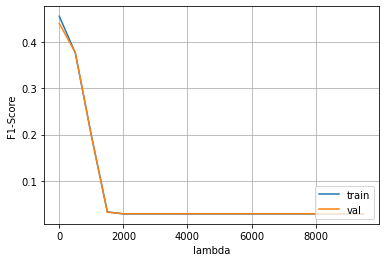

In [ ]:
# minority class needs more weighting

# Hyper-pram tuning
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

train_scores = []
val_scores = []
scaler = StandardScaler()
l=0.01
h= 10000.0 # change to 10000.0
d=500.0 # change to 500.0

for la in np.arange(l,h,d):
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la, class_weight={ 0:0.001, 1:0.2 }))
  scaled_lr.fit(X_train, y_train)
  train_y_pred = scaled_lr.predict(X_train)
  val_y_pred = scaled_lr.predict(X_val)
  train_score = f1_score(y_train, train_y_pred)
  val_score = f1_score(y_val, val_y_pred)
  train_scores.append(train_score)
  val_scores.append(val_score)

#plotting
plt.figure()
plt.plot(list(np.arange(l,h,d)), train_scores, label="train")
plt.plot(list(np.arange(l,h,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

In [ ]:
# Alternatives metrics for imbalanced data:
# Brier-Score: 1/n*SUM[Y_i - Y_i_hat]^2 = AVG Squared Error
# G-mean: SQRT(Sensitivity * Specificity)=SQRT(TPR*TNR) ----Seldom used